# The Problem: XOR Classification
- Consider the logical operation XOR (Exclusive-or):

| bits | output |
|-|-|
| 1   0  | 1 |
| 0   1  | 1 |
| 0   0  | 0 |
| 1   1  | 0 |

- Can a linear model fit this function? Let's look at the graphical representation of the XOR function:
<img src="images/xor.png" />

- Clearly the XOR is not **linearly separable**, it is **nonlinear**
- This kind of problem is perfect for a **neural network**

## Neural Networks
- How can we model neurons in the brain and computationally represent them?
<img src="images/neuron.png" />

- From this basic building block we can begin to build simple neural networks. The XOR neural network looks like:

<img src="images/xornn.png" />

- For now, we use this graph representation of neural networks for ease of visualization, but it does not scale to larger networks. Remember that neural networks are really just functions that look like this:

$$ NN(x) = f(W_nf(W_{n-1}f(...f(W_1x + b_1)) + b_{n-1}) + b_n) $$

- Note that $ f(\cdot) $ **must** be nonlinear in order to model nonlinear functions, otherwise it's easy to show that if $ f(\cdot) $ is linear, then the entire neural network reduces to a linear model and were back to square one

In [37]:
# Import dependencies
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
# Set the random seed
np.random.seed(43252)

In [39]:
# Data generating function
def generate_data():
    """Generates bitpairs for the xor neural network
    """
    
    return bitpairs, xor_labels

In [40]:
# Define the initalization scheme for the network
def get_parameters():
    """Generates weights for the XOR network sampled from the normal distribution
    """
    
    return w, b

In [41]:
# Debugging tool for checking tensor shapes
def print_shapes(ls, name):
    """Helper to print shapes of elements in a list
    """
    print(f"{name}: {[l.shape for l in ls]}")

## Sigmoid Function
- The sigmoid functions maps any real input to a probability value $ \sigma \in [0, 1] $  

$$ \sigma(x) = \frac{1}{1 + \exp(-x)} $$  
  
- We use the sigmoid function for the XOR neural network because our goal is to predict values in the set $ \{0, 1\} $, and the sigmoid function allows us to output a continuous approximation of this discrete set  
- Techincally we can use different activation functions for every layer (as long as the output is in $ [0, 1] $ ), but for the purposes of this tutorial, we will use the sigmoid function throughout

In [42]:
# Define the activation function
def sigmoid(x, deriv=False):
    """Defines the sigmoid activation function and its derivative
    """
    if deriv:
        return 
    return 

## Binary Cross-Entropy Function
- The cross entropy function is used as a distance measure between probabilty distributions
- The discrete version of cross entropy is as follows:

$$ H(\textbf{p}, \textbf{q}) = -\sum_{i = 1}^m q_i\log(p_i) $$

- Since we're predicting a single probability value, we can think of our discrete output distribution as $ [\sigma, 1 - \sigma] $, where $\sigma$ is the output from the neural network, and the discrete target distribution as $ [y, 1 - y] $ and thus, $ m = 2 $. So the cross entropy function reduces to the **binary cross entropy** function:  

$$ H(p, q) = -(q\log(p) + (1 - q)\log(1 - p)) $$

- Where p and q are the predicted and target distributions respectively. Our optimization objective is to minimize the binary cross entropy between the XOR labels and the network outputs

In [43]:
# Define the loss function
def binary_xentropy(target, p, deriv=False):
    """Defines the binary cross entropy loss function and its derivative
    """
    if deriv:
        return 
    return 

## Shuffling
- In SGD (stochastic gradient descent), we make updates on the parameters over randomly shuffled **mini-batches**.  
  
  
- Why do we shuffle and batch, rather than computing gradients over the entire dataset once?  
    + For big datasets, this could be computationally intractable  
    + For non-convex functions or functions with many local minima, gradient descent could get stuck a bad minima  
  
  
- The stochasticity introduced by the random shuffling then batching in SGD allows our optimization procedure to make   noisy gradient updates, and possibly 'jump out' of bad local minima we land in

In [44]:
def shuffle_and_batch(X, Y, batch_size):
    """Method to shuffle and batch training data
    """
    assert batch_size <= len(X), print("Batch size must be smaller than the dataset size")
    
    
    
    # Return a generator for the data
    return ((x[i: i + batch_size], y[i: i + batch_size]) for i in range(0, length, batch_size))

## The Forward Pass: How neural networks process data
- Neural networks process data through forward propogation i.e. sending the data input signal through all neurons
- The math for the forward propogation is simple:  
  
$$ z_j^{l} = \sum_{i = 1}^{n} a_i^{l - 1}w_{ij}^{l} + b_j^{l} $$  
  
   
$$ a_j^{l} = \sigma(z_j^l) $$

- In matrix-vector notation:

$$ \textbf{z}^{l} = \textbf{a}^{l - 1}\textbf{W}^l + \textbf{b}^l $$  

  
$$ \textbf{a}^{l} = \sigma(\textbf{z}^{l})$$

In [45]:
def feedforward(x, weights, biases):
    """Perform feed forward operation
    """
    zs, activations, d_activations = [], [x], []
    for w, b in zip(weights, biases):
        
        # compute and store the the linear transformation
        
        
        # compute the nonlinear transformation
        
        
        # compute the activation function derivative
        
    
    return zs, activations, d_activations

## The Backward Pass: The workhorse of neural network optimization
- At this point, we know how to use gradient descent to optimize parameters for a 'single' layer linear model, but how do we optimize a multi-layer neural network e.g. $ f(x) = \sigma(w_2\sigma(w_1x + b_1) + b_2) $ ?
- Thanks to Geoffrey Hinton, in 1986 he invented [an algorithm](https://www.iro.umontreal.ca/~vincentp/ift3395/lectures/backprop_old.pdf) to solve this problem called back-propogation
- Michael Nielsen has made an amazing modern tutorial on backpropogation [here](http://neuralnetworksanddeeplearning.com/chap2.html)  
  
  
- Our optimization objective is to find $ \nabla_\theta\mathcal{L} $ so that we can adjust the parameters $\theta$ in the direction that minimizes our loss function $\mathcal{L}$
- From Michael Nielsen's website there are four fundamental equations to backpropogation (proofs are provided on his website, two are left as an exercise)

\begin{equation}
\delta^{L} = \nabla_a{\mathcal{L}}\odot\sigma^\prime(z^L)
\end{equation}

\begin{equation}
\delta^{l} = (\delta^{l + 1}(w^{l + 1})^T)\odot\sigma^\prime(z^l)
\end{equation}

\begin{equation}
\frac{\partial{\mathcal{L}}}{\partial{w_{jk}^l}} = (a^{l-1})^T \delta_j^l
\end{equation}

\begin{equation}
\frac{\partial{\mathcal{L}}}{\partial{b_{j}^l}} = \delta_j^l
\end{equation}

- ### TODO: include proofs, for now go over Michael Nielsen's tutorial

In [46]:
def backprop(x, y, weights, biases):
    """Obtain gradients through backprop
    """
    
    # get the z values, activations, and activation derivatives
    
    
    # calculate the erro signal and compute gradient for last layer paramters
    
    
    
    
    # compute gradients of the rest of the layers
    for layer in range(2, len(weights) + 1):
        
        # compute the error signal using the higher layer's error signal
        
        
        # compute gradients
        
        
    return gradw, gradb

## SGD: A recap
- We've seen how to do gradient descent applied to linear regression for one-dimensional inputs, its a minor adjustment to handle multiple dimensional gradient updates:

\begin{equation}
W^l := W^l - \alpha\nabla_{W^l}\mathcal{L}
\end{equation}

\begin{equation}
b^l := b^l - \alpha\nabla_{b^l}\mathcal{L}
\end{equation}


In [47]:
def SGD(X, Y, batch_size, lr, weights, biases):
    """Performs stochastic gradient descent over mini batches
    """
    
    # loadn data in batches
    for x, y in shuffle_and_batch(X, Y, batch_size):
        
        # obtain the gradients for current mini batch
        
        
        # update params
        

In [48]:
def train(dataset, weights, biases, epochs=100, lr=1e-3, batch_size=4):
    """Trains the XOR neural network with SGD
    """
    losses = []
    for epoch in range(epochs):

        # perform stochastic gradient through the network
        

        # evaluate network
        
        
        losses.append(epoch_loss)
        if epoch % (epochs // 10) == 0:
            print(f"Running epoch {epoch:06d} - loss: {epoch_loss:.06f}")

    return losses

In [49]:
def predict(dataset, weights, biases):
    """Make predictions on the dataset with the trained network
    """
    X, _ = dataset
    _, activations, _ = feedforward(X, weights, biases)
    print("Truth table predictions")
    print("_______________________")
    for x, pred in zip(X, activations[-1]):
        print(f"{x[0]} {x[1]} | {pred[0]:.14f}")

In [50]:
def plot_loss(losses):
    """Plots the losses of the network over the training phase
    """
    plt.figure()
    plt.title(f"Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("binary cross-entropy loss")
    plt.plot(losses)
    plt.show()

Running epoch 000000 - loss: 0.697764
Running epoch 000100 - loss: 0.462954
Running epoch 000200 - loss: 0.077846
Running epoch 000300 - loss: 0.027117
Running epoch 000400 - loss: 0.015586
Running epoch 000500 - loss: 0.010785
Running epoch 000600 - loss: 0.008198
Running epoch 000700 - loss: 0.006592
Running epoch 000800 - loss: 0.005503
Running epoch 000900 - loss: 0.004717


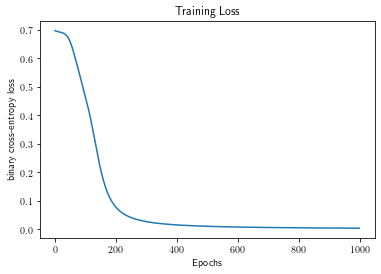

In [72]:
# initialize the parameters and get the data


# train the network and plot the loss curve

plot_loss(losses)

In [73]:
# Evaluate the network after training
predict(dataset, weights, biases)

Truth table predictions
_______________________
1 0 | 0.99708818182884
0 1 | 0.99709173938381
0 0 | 0.00235362627008
1 1 | 0.00829711398457


In [74]:
# Plot the surface of activations that the network learned
def plot_activation_surface(weights, biases, three_dim=False):

    X, Y = np.mgrid[0:1.1:0.1, 0:1.1:0.1]
    dataset = np.array([[x, y] for rowx, rowy in zip(Y, X) for x, y in zip(rowx, rowy)])
    
    _, activations, _ = feedforward(dataset, weights, biases)
    activation_grid = activations[-1].reshape(X.shape[0], Y.shape[0]).T
    
    if three_dim:
        ax = plt.axes(projection='3d')
        ax.view_init(50, 120)
        ax.plot_surface(X, Y, activation_grid, cmap='binary_r')
    else:
        plt.xlim(0, 10)
        plt.ylim(0, 10)
        plt.imshow(activation_grid, cmap='binary_r')

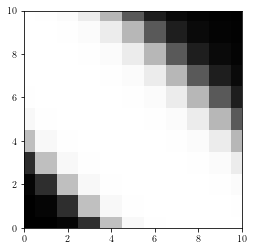

In [75]:
# plot 2d activation map
plot_activation_surface(weights, biases)

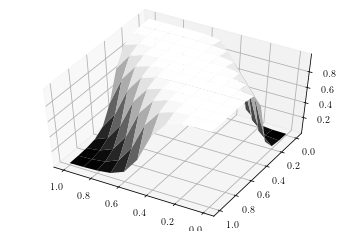

In [76]:
# plot 3d activation map
plot_activation_surface(weights, biases, three_dim=True)